In [1]:
import notebook
E = notebook.nbextensions.EnableNBExtensionApp()
E.enable_nbextension('usability/codefolding/main')

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cPickle

import seaborn as sns

## Importing Data

In [22]:
with open('data/player_to_rank.p','rb') as f:
     player_to_rank_dict = cPickle.load(f)
with open('data/player_to_pt.p','rb') as f:
     player_to_pts_dict = cPickle.load(f)
with open('data/player_to_country.p') as f:
    player_to_cntry_dicts = cPickle.load(f)
with open('data/player_to_tag.pckl') as f:
    player_to_tag = cPickle.load(f)

In [310]:
with open('data/player_to_character.pckl') as f:
    player_to_character = cPickle.load(f)
with open('data/player_to_cumpts.pckl') as f:
    player_to_cumpts = cPickle.load(f)
with open('data/player_to_cumplacements.pckl') as f:
    player_to_cumplacements = cPickle.load(f)

In [4]:
with open('data/player_rank_link.p') as f:
    player_rank_link = cPickle.load(f)

In [32]:
with open('data/scrubed_tourney_data.p', 'rb') as f_:
    scrubed_tourney_data = cPickle.load(f_) 

In [314]:
player_to_tag

-6                             None
801 Jayce the Ace               YBK
801 Strider                     WFX
AHo                            None
AbAb                           None
Abang                       DouyuTV
Afii                           None
Ahbao                         Qanba
AiAi                           None
Air                             CCG
Akimo                          None
Akira                          None
Alex Valle                       LU
Alexandro                       SFT
Alucard                          F3
Andreas                    Deku.WSO
Andy                             CH
Anton                          None
Ars                            TCCR
BS Ioros                        TsD
Baby Brasil                     AAG
Badi Lootion                   None
Baoice                          XFT
Bashfest                       None
Battousai                      SiLG
Bebedero                         TG
Berzack                        None
BliRedd                     

## Making DataSeries

In [ ]:
player_rank = pd.Series(player_to_rank_dict, name='Rank')
player_pts = pd.Series(player_to_pts_dict, name='Points')
player_to_cntry = pd.Series(player_to_cntry_dicts, name='Country')
player_to_tag = pd.Series(player_to_tag, name='Tag')

## Making DataFrames

In [ ]:
series_list = [player_pts, player_rank, player_to_cntry, player_to_tag]
player_data = dict([(series.name, series) for series in series_list])
player_data = pd.DataFrame(player_data)

## Merging Names

In [277]:
scrubed_tourney_data

[[(1, u' /r/Kappa', 'Poongko', ['Seth', 'El Fuerte'], 128),
  (2, u' HORI', 'Sako', ['Elena', 'Evil Ryu', 'Gen'], 64),
  (3, u' /r/Kappa', 'Infiltration', ['Decapre', 'Akuma', 'Hakan'], 32),
  (4, None, 'JehoSan', ['Cammy', 'Decapre', 'Guile'], 16),
  (5, None, 'Tonpy', ['C.Viper'], 8),
  (5, u'GL', 'Valmaster', ['Chun-Li'], 8),
  (7, None, 'Dieminion', ['Guile'], 4),
  (7, u'Qanba', 'Xiao Hai', ['Cammy'], 4),
  (9, u'UM', 'ImStillDaDaddy', ['Guile'], 2),
  (9, None, 'Ninja Shakz', ['Abel'], 2),
  (9, u'DIG', 'Prodigal Son', ['Sagat', 'Ryu', 'Abel'], 2),
  (9, u'RZR CG', 'Problem X', ['C.Viper'], 2),
  (13, None, 'F-Word', ['Ibuki'], 1),
  (13, u'RIZE', 'Pro Fluke', ['El Fuerte'], 1),
  (13, u'Daddy', 'Renegad', ['Poison'], 1),
  (13, u'BX3', 'Phenom', ['M.Bison'], 1)],
 [(1, None, 'Dark Jiewa', ['Ken'], 128),
  (2, u'CCG', 'Humanbomb', ['Sakura', 'Poison', 'Ryu'], 64),
  (3, None, 'Chuan', ['Guile', 'Fei Long', 'Zangief', 'Yun'], 32),
  (4, None, 'XiaoLong', ['M.Bison'], 16),
  (5, u'

In [159]:
player_names = set(player_data.index.tolist())

In [268]:
# missing = []
# for tourney in scrubed_tourney_data:
#     for dat in tourney:
#         if dat[2] not in player_names:
#             in_l = False
#             try:
#                 nm = missing_to_good[dat[2]]
#                 in_l = nm in player_names
#             except KeyError:
#                 pass
#             if not in_l:    
#                 missing.append(dat[2])

In [275]:
missing_to_good = dict([('Ricki Ortiz','Ricky Ortiz'), ('801 Jayce the Ace','Jayce the Ace'),
                       ('801Strider', '801 Strider'), ('NativeImpact', 'Native Impact'),
                       ('Ryan Hart (Prodigal Son)', 'Ryan Hart'), ('Prodigal Son', 'Ryan Hart'),
                        ('SnakeEyez', 'Snake Eyez'), ('Humanbomb','HumanBomb'),
                       ('Itazan', 'Itabashi Zangief'), ('Itabashi Zangief (Itazan)', 'Itabashi Zangief'),
                       ('Sabin (Arturo Sanchez)','Sabin'), ('FGC/pepeday','Pepeday'),
                       ('Saunic','SAUNIC'), ("Dian",'Dianminion'),
                       ('Shiro', 'Shiro (Shirou)'), ('Gattikun','Gachikun (Gattikun)'), ('Gachikun', 'Gachikun (Gattikun)'),
                       ('Daigo','Daigo Umehara'), ('Gamerbee','GamerBee'),
                       ('SD Pnoy', 'Pnoy'), ('Brentt',"Brenttiscool"),
                       ('DB Koopa','DB.KOOPA'), ('Laugh','LAUGH'),
                       ('infexious','Infexious'), ('GamberBee','GamerBee'),
                       ('QiuQiuKOF','QuiQuiKOF'), ('Xiaolong','XiaoLong'),
                       ('GuN SLinGa','Gunslinga'), ('StromKubo','StormKUBO'),
                       ('CodyNP','CodyNp'), ('KIM1234','Kim1234'), ('ElChakotay','El Chakotay'),
                       ('DarkChild','Darkchild'), ('Velociraptor','Veloc1raptor'), ('Keno','Keno (2015)'),
                       ('Gonzalez','Gonzales'), ('Pugera', "EX Pugera"),
                       ('MF Tonpy', 'Tonpy'), ('Deku Andreas', 'Andreas'),
                       ('XR Prometo','XR PROMETO'), ('Fabinho','FABINHO')])

In [276]:
# with open('data/missing_to_good.pckl', 'wb') as f_:
#     cPickle.dump(missing_to_good, f_)

In [273]:
player_data.loc["emptysys"]

Country    Germany
Points           1
Rank           216
Tag           None
Name: emptysys, dtype: object

In [158]:
# player_data = player_data.rename(index={'Chris': 'Chris Tatarian'})

## Adding tournament data

In [ ]:
(13, u' GL', 'Saunic', ['Ibuki'], 2),

In [286]:
player_to_character = dict([(name,[]) for name in player_names])
player_to_cumpts = dict([(name,[]) for name in player_names])
player_to_cumplacements = dict([(name,[]) for name in player_names])

In [293]:
for tourney in scrubed_tourney_data:
    for place, tag, name, char_list, pts in tourney:
        if name not in player_names:
            name = missing_to_good[name]
        player_to_character[name].extend(char_list)
        player_to_cumpts[name].append(pts)
        player_to_cumplacements[name].append(place)
        

In [309]:
with open('data/player_to_cumplacements.pckl', 'wb') as f_:
    cPickle.dump(player_to_cumplacements, f_)

## Plots

In [25]:
player_data.sort_values(by="Rank",inplace=True)

(300, 0.5)

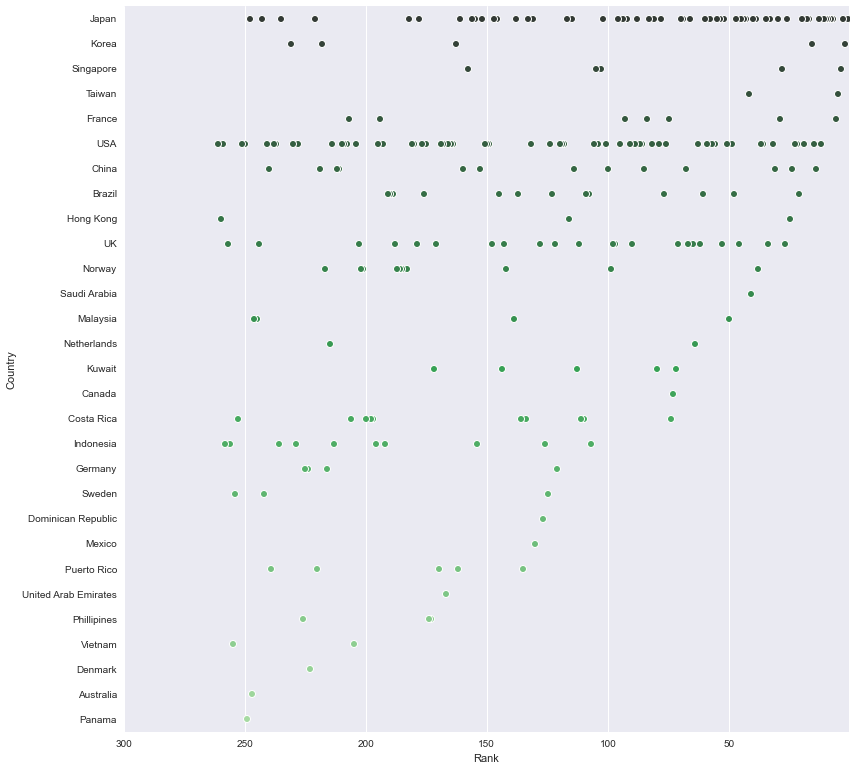

In [284]:
fig,ax = plt.subplots(figsize=(13,13))
sns.stripplot(y="Country", x="Rank", data=player_data[player_data['Country'] != ''], palette="Greens_d");
ax.set_xlim(300,.5)

(300, 0.5)

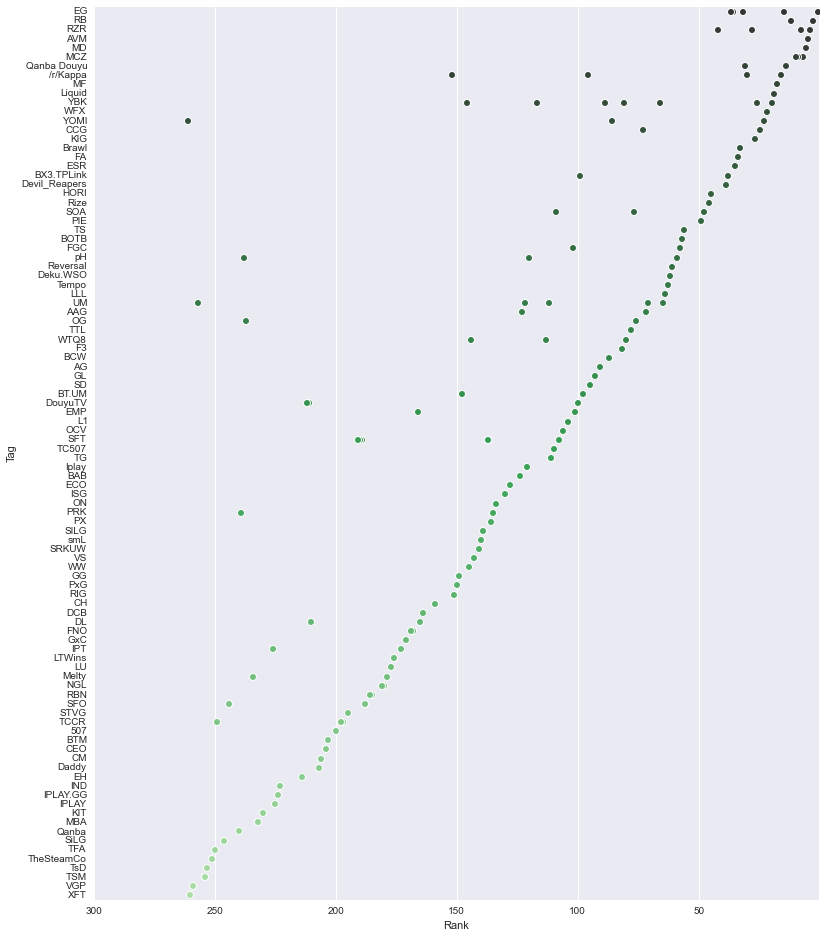

In [40]:
fig,ax = plt.subplots(figsize=(13,16))
sns.stripplot(y="Tag", x="Rank", data=player_data, palette="Greens_d");
ax.set_xlim(300,.5)

In [29]:
all_player_data

[[(1, 'Poongko', ['Seth', 'El Fuerte'], 128),
  (2, 'Sako', ['Elena', 'Evil Ryu', 'Gen'], 64),
  (3, 'Infiltration', ['Decapre', 'Akuma', 'Hakan'], 32),
  (4, 'JehoSan', ['Cammy', 'Decapre', 'Guile'], 16),
  (5, 'Tonpy', ['C.Viper'], 8),
  (5, 'Valmaster', ['Chun-Li'], 8),
  (7, 'Dieminion', ['Guile'], 4),
  (7, 'Xiao Hai', ['Cammy'], 4),
  (9, 'ImStillDaDaddy', ['Guile'], 2),
  (9, 'Ninja Shakz', ['Abel'], 2),
  (9, 'Prodigal Son', ['Sagat', 'Ryu', 'Abel'], 2),
  (9, 'Problem X', ['C.Viper'], 2),
  (13, 'F-Word', ['Ibuki'], 1),
  (13, 'Pro Fluke', ['El Fuerte'], 1),
  (13, 'Renegad', ['Poison'], 1),
  (13, 'Phenom', ['M.Bison'], 1)],
 [(1, 'Dark Jiewa', ['Ken'], 128),
  (2, 'Humanbomb', ['Sakura', 'Poison', 'Ryu'], 64),
  (3, 'Chuan', ['Guile', 'Fei Long', 'Zangief', 'Yun'], 32),
  (4, 'XiaoLong', ['M.Bison'], 16),
  (5, 'Saunic', ['Ibuki', 'Dhalsim'], 8),
  (5, 'Revenger32', ['Abel'], 8),
  (7, 'CodyNp', ['Decapre', 'Poison', 'Ryu'], 4),
  (7, 'Dian', ['Guile', 'M.Bison'], 4),
  (9, 

In [26]:
player_data[player_data['Country']=='USA']

,Country,Points,Rank,Tag
Snake Eyez,USA,440,12,RB
Justin Wong,USA,310,15,EG
NuckleDu,USA,268,19,Liquid
801 Strider,USA,238,22,WFX
Dieminion,USA,236,23,YOMI
PR Balrog,USA,132,32,EG
Ricki Ortiz,USA,100,36,EG
K-Brad,USA,96,37,EG
Smug,USA,60,49,PIE
Filipinoman,USA,52,51,None


In [13]:
with open('data/all_player_data.p') as f:
    all_player_data = cPickle.load(f)

In [14]:
all_player_data

[[(1, 'Poongko', ['Seth', 'El Fuerte'], 128),
  (2, 'Sako', ['Elena', 'Evil Ryu', 'Gen'], 64),
  (3, 'Infiltration', ['Decapre', 'Akuma', 'Hakan'], 32),
  (4, 'JehoSan', ['Cammy', 'Decapre', 'Guile'], 16),
  (5, 'Tonpy', ['C.Viper'], 8),
  (5, 'Valmaster', ['Chun-Li'], 8),
  (7, 'Dieminion', ['Guile'], 4),
  (7, 'Xiao Hai', ['Cammy'], 4),
  (9, 'ImStillDaDaddy', ['Guile'], 2),
  (9, 'Ninja Shakz', ['Abel'], 2),
  (9, 'Prodigal Son', ['Sagat', 'Ryu', 'Abel'], 2),
  (9, 'Problem X', ['C.Viper'], 2),
  (13, 'F-Word', ['Ibuki'], 1),
  (13, 'Pro Fluke', ['El Fuerte'], 1),
  (13, 'Renegad', ['Poison'], 1),
  (13, 'Phenom', ['M.Bison'], 1)],
 [(1, 'Dark Jiewa', ['Ken'], 128),
  (2, 'Humanbomb', ['Sakura', 'Poison', 'Ryu'], 64),
  (3, 'Chuan', ['Guile', 'Fei Long', 'Zangief', 'Yun'], 32),
  (4, 'XiaoLong', ['M.Bison'], 16),
  (5, 'Saunic', ['Ibuki', 'Dhalsim'], 8),
  (5, 'Revenger32', ['Abel'], 8),
  (7, 'CodyNp', ['Decapre', 'Poison', 'Ryu'], 4),
  (7, 'Dian', ['Guile', 'M.Bison'], 4),
  (9, 

In [79]:
player_data.groupby('Country').Points.sum().sort_values(ascending=False)/player_data["Country"].value_counts()

                          2.000000
Australia                 1.000000
Brazil                   31.076923
Canada                   16.000000
China                    58.538462
Costa Rica                4.700000
Denmark                   1.000000
Dominican Republic        4.000000
France                  130.428571
Germany                   2.000000
Hong Kong                70.333333
Indonesia                 2.300000
Japan                   144.592593
Korea                   277.600000
Kuwait                    9.200000
Malaysia                 16.250000
Mexico                    4.000000
Netherlands              12.500000
Norway                   10.300000
Panama                    1.000000
Phillipines               1.666667
Puerto Rico               2.000000
Saudi Arabia             72.000000
Singapore               195.200000
Sweden                    2.000000
Taiwan                  405.500000
UK                       25.136364
USA                      39.068966
United Arab Emirates

In [75]:
player_data["Country"].value_counts()

USA                     58
Japan                   54
UK                      22
Brazil                  13
China                   13
                        13
Indonesia               10
Costa Rica              10
Norway                  10
France                   7
Puerto Rico              5
Kuwait                   5
Singapore                5
Korea                    5
Germany                  4
Malaysia                 4
Sweden                   3
Phillipines              3
Hong Kong                3
Vietnam                  2
Netherlands              2
Taiwan                   2
Dominican Republic       1
Saudi Arabia             1
Panama                   1
United Arab Emirates     1
Denmark                  1
Mexico                   1
Canada                   1
Australia                1
Name: Country, dtype: int64